In [5]:
#Importing necessary libraries for data manipulation, analysis, and machine learning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from sklearn.datasets import load_iris
iris=load_iris()
df= pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.shape

(150, 5)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
df['target'].unique()

array([0, 1, 2])

In [11]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


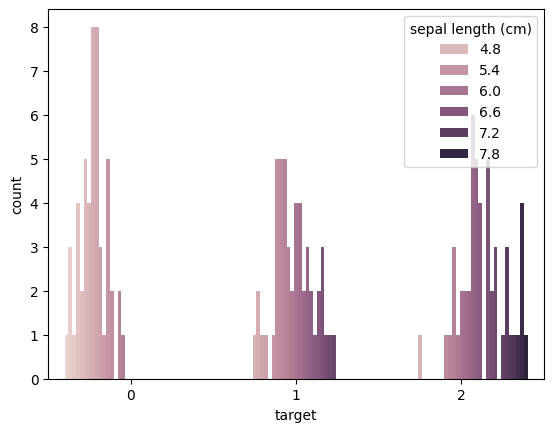

In [12]:
sns.countplot(data=df,x='target',hue='sepal length (cm)');

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

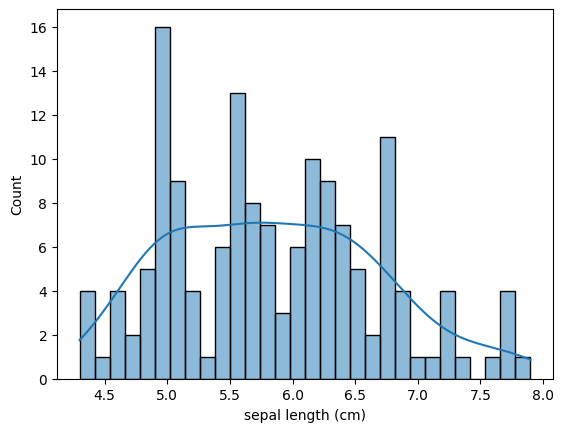

In [13]:
sns.histplot(df['sepal length (cm)'],bins=30,kde=True)

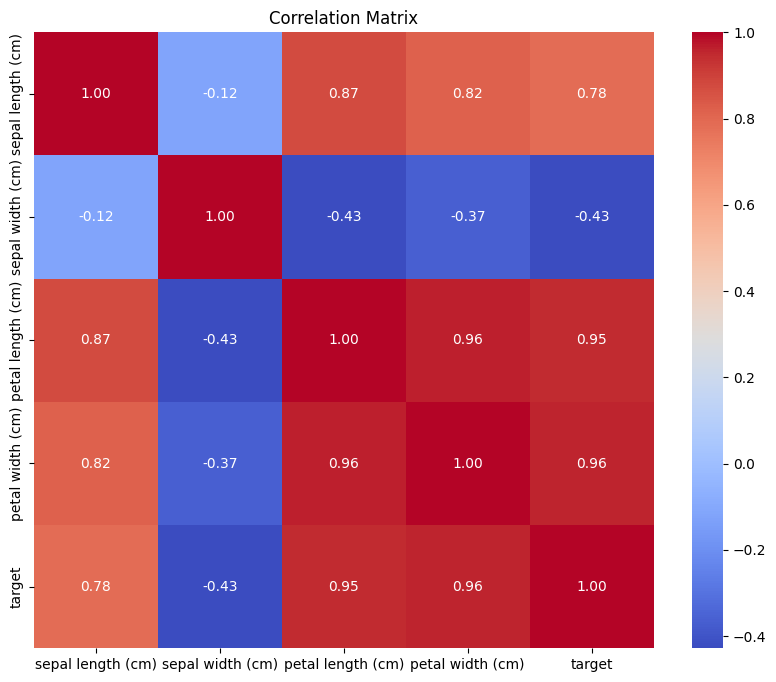

In [14]:
numeric = df.select_dtypes(include=[np.number])
corr_matrix = numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

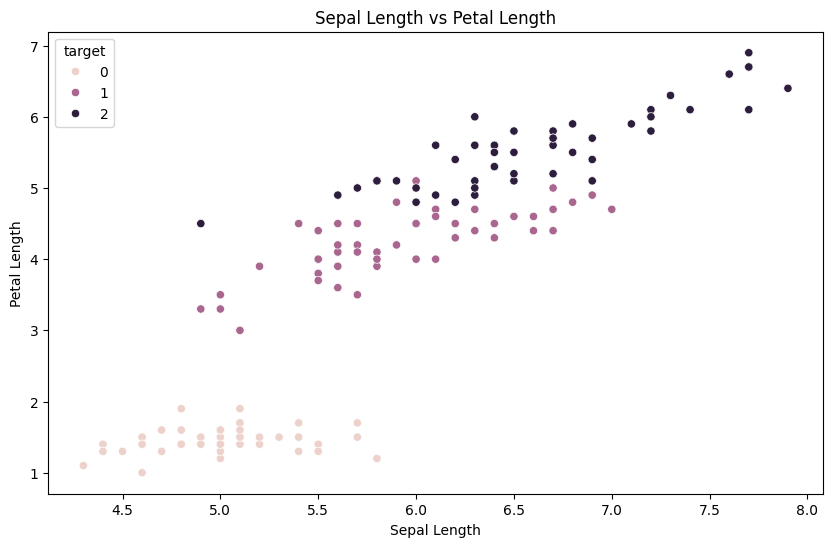

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='sepal length (cm)',y='petal length (cm)',hue='target')
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

<ipython-input-16-d3be6624044f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='petal length (cm)', data=df,palette='muted')


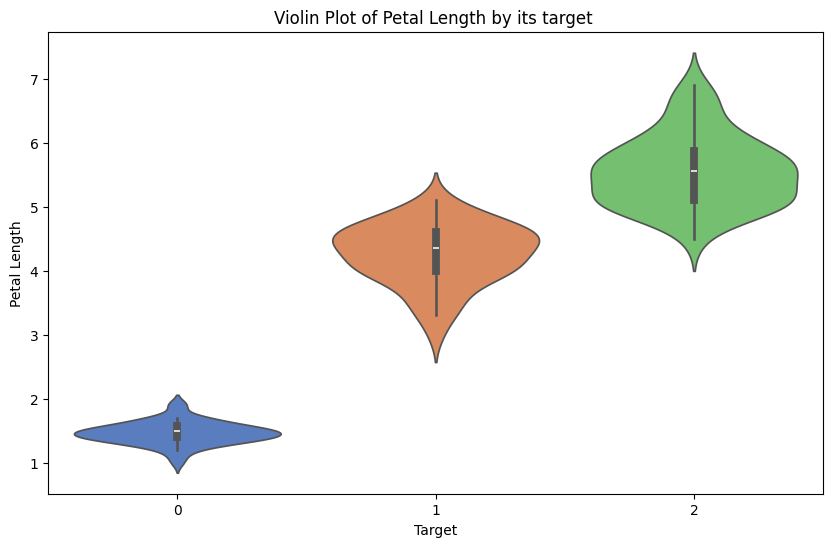

In [16]:
plt.figure(figsize=(10,6))
sns.violinplot(x='target', y='petal length (cm)', data=df,palette='muted')
plt.title('Violin Plot of Petal Length by its target ')
plt.xlabel('Target')
plt.ylabel('Petal Length')
plt.show()

<ipython-input-17-35e47cf7651b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='target', y='sepal length (cm)', data=df, palette='cool')


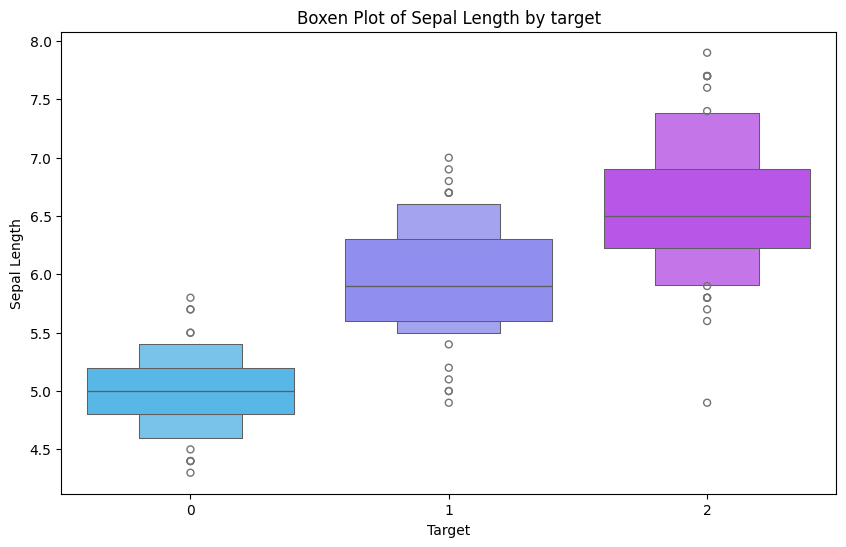

In [17]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='target', y='sepal length (cm)', data=df, palette='cool')
plt.title('Boxen Plot of Sepal Length by target')
plt.xlabel('Target')
plt.ylabel('Sepal Length')
plt.show()

In [32]:
import pickle
# Assuming 'df' is your DataFrame containing the iris dataset
X=df.drop('target',axis=1)  # Features
# Convert the target variable to integers representing classes
y=df['target'].astype(int)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [33]:
import pickle
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred_log_reg=log_reg.predict(X_test)

accuracy_log_reg=accuracy_score(y_test,y_pred_log_reg)
conf_matrix_log_reg=confusion_matrix(y_test,y_pred_log_reg)
class_report_log_reg=classification_report(y_test,y_pred_log_reg)
print(f"Logistic Regression Accuracy:{accuracy_log_reg:.2f}")
print('confusion_matrix:')
print(conf_matrix_log_reg)
print('classification_report:')
print(class_report_log_reg)

# Save the model
with open("iris_logistic_model.pkl", "wb") as model_file:
    pickle.dump(log_reg, model_file)

# Save the scaler
with open("iris_scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)






Logistic Regression Accuracy:1.00
confusion_matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred_tree=tree_clf.predict(X_test)
accuracy_tree=accuracy_score(y_test,y_pred_tree)
conf_matrix_tree=confusion_matrix(y_test,y_pred_tree)
class_report_tree=classification_report(y_test,y_pred_tree)
print(f'Decision Tree accuracy;{accuracy_tree:.2f}')
print('Confusion matrix:')
print(conf_matrix_tree)
print('classification_report')
print(class_report_tree)

Decision Tree accuracy;1.00
Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)
y_pred_knn=knn_clf.predict(X_test)
accuracy_knn=accuracy_score(y_test,y_pred_knn)
conf_matrix_knn=confusion_matrix(y_test,y_pred_knn)
class_report_knn=classification_report(y_test,y_pred_knn)
print(f'k-NN Accuracy;{accuracy_knn:.2f}')
print('Confusion matrix:')
print(conf_matrix_knn)
print('classification_report')
print(class_report_knn)

k-NN Accuracy;1.00
Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



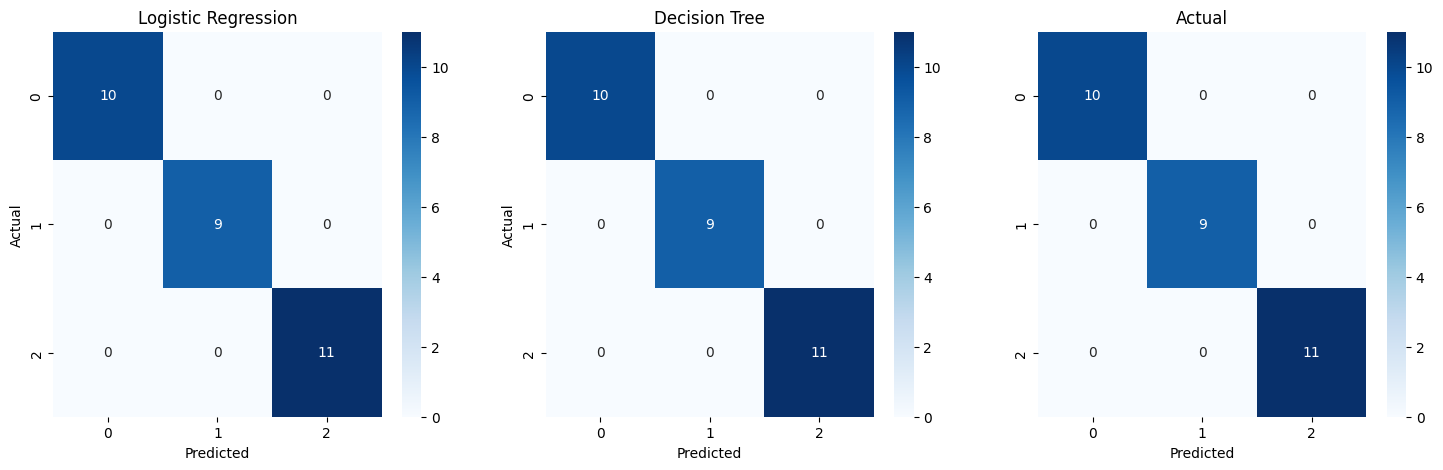

In [23]:
#visualizing the confusion matrices
fig,axes=plt.subplots(1,3,figsize=(18,5))
#logistic regression
sns.heatmap(conf_matrix_log_reg,annot=True,fmt='d',cmap='Blues',ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

#Decision Tree
sns.heatmap(conf_matrix_tree,annot=True,fmt='d',cmap='Blues',ax=axes[1])
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

#k-NN
sns.heatmap(conf_matrix_knn,annot=True,fmt='d',cmap='Blues',ax=axes[2])
axes[2].set_title('k-NN')
axes[2].set_xlabel('Predicted')
axes[2].set_title('Actual')
plt.show()

In [24]:

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
X=df.drop('sepal length (cm)',axis=1)
y=df['sepal length (cm)']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

models={
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression":Lasso(),
    "Decision Tree Regressor":DecisionTreeRegressor()
}

In [25]:
results=pd.DataFrame(columns=["Model","MSE","MAE","R2_score"])

for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    results=pd.concat([results,pd.DataFrame({
    'Model':[model_name],
    'MSE':[mse],
    'MAE':[mae],
    'R2_score':[r2]
})],ignore_index=True)
print(results)

                     Model       MSE       MAE  R2_score
0        Linear Regression  0.100016  0.235709  0.855106
1         Ridge Regression  0.093400  0.229727  0.864691
2         Lasso Regression  0.523988  0.581865  0.240891
3  Decision Tree Regressor  0.241500  0.403333  0.650135


<ipython-input-25-668e7563b312>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results=pd.concat([results,pd.DataFrame({


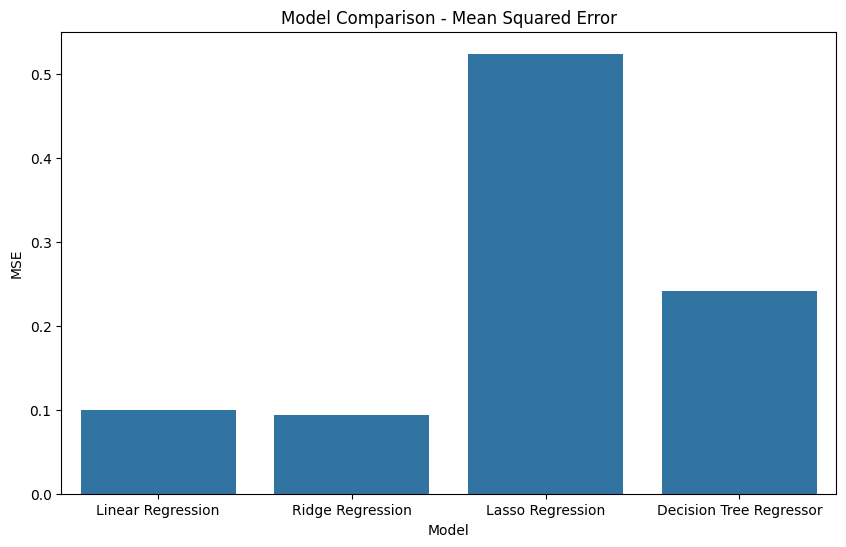

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x="Model",y="MSE",data=results)
plt.title("Model Comparison - Mean Squared Error")
plt.show()

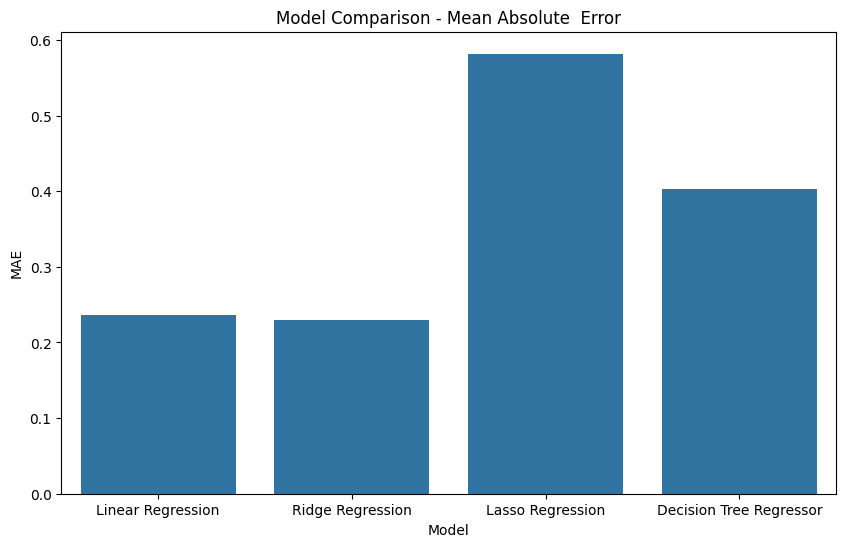

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x="Model",y="MAE",data=results)
plt.title("Model Comparison - Mean Absolute  Error")
plt.show()

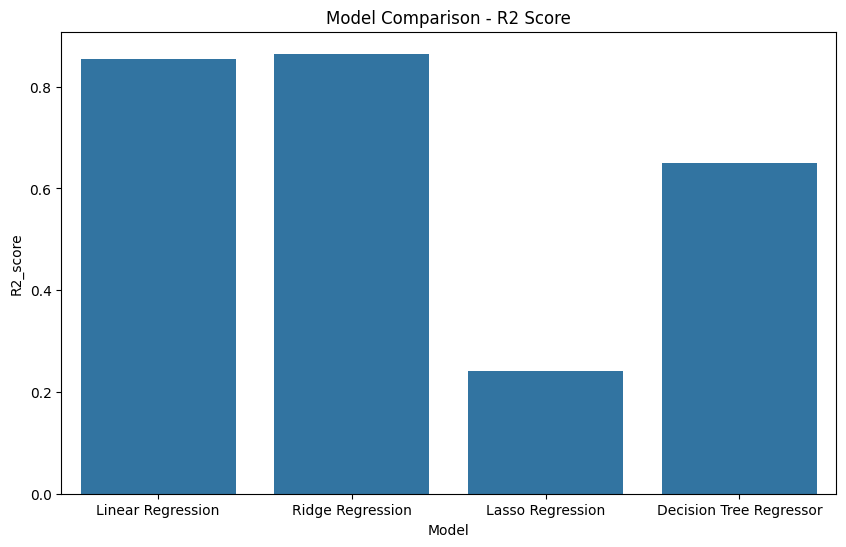

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R2_score", data=results)
plt.title("Model Comparison - R2 Score")
plt.show()

In [36]:
import pickle
import numpy as np

def predict_iris_species(model_path, scaler_path, input_features):
    """
    Predict the species of an Iris flower using a saved Logistic Regression model and scaler.

    Parameters:
    - model_path (str): Path to the saved model .pkl file
    - scaler_path (str): Path to the saved scaler .pkl file
    - input_features (list or array): Feature values [sepal_length, sepal_width, petal_length, petal_width]

    Returns:
    - str: Predicted Iris species
    """
    try:
        # Load model and scaler
        with open(r'/content/iris_logistic_model.pkl', 'rb') as model_file:
            model = pickle.load(model_file)
        with open(r'/content/iris_scaler.pkl', 'rb') as scaler_file:
            scaler = pickle.load(scaler_file)

        # Convert and scale input
        input_array = np.array([input_features])
        input_scaled = scaler.transform(input_array)

        # Predict
        prediction = model.predict(input_scaled)[0]
        species = ['setosa', 'versicolor', 'virginica']
        return f"Predicted Iris species: {species[prediction]}"

    except Exception as e:
        return f"An error occurred during prediction: {e}"

    # Example input: sepal_length, sepal_width, petal_length, petal_width
input_features = [5.1, 3.5, 1.4, 0.2]

# Paths to saved model and scaler
model_path = "iris_logistic_model.pkl"
scaler_path = "iris_scaler.pkl"

# Get prediction
result = predict_iris_species(model_path, scaler_path, input_features)
print(result)



Predicted Iris species: setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
